#####  Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import requests

##### Step 2: Rea the Dataset (not using URL) 

In [52]:
#url = "https://www..../download"
#data = requests.get(url)
#data.headers

df = pd.read_csv("cardata.csv")

##### Let's take a look at the data;

In [53]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
df.shape

(301, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Now lets take a look at a list of data types:

In [56]:
df.describe(include="all")  

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [57]:
df.describe(exclude="number")  # df.describe(include="object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [58]:
df.describe(include="number")

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [59]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

##### Lets see how many categories there are in categorical data:

In [60]:
n1 = df["Car_Name"].nunique()
n2 = df['Fuel_Type'].nunique()
n3 = df["Seller_Type"].nunique()
n4 = df["Transmission"].nunique()

In [61]:
print (f" unique categories: \n car_name: {n1} \n fuel_type: {n2} \n seller_type: {n3} \n transmission: {n4}")

 unique categories: 
 car_name: 98 
 fuel_type: 3 
 seller_type: 2 
 transmission: 2


##### for all the categories except car_name the number of unique categories are reasonable, but for car_name it's very large compared to the number of samples in the data set; so we'll drop it:

In [62]:
df.drop("Car_Name", axis=1, inplace=True)   # axis = 1 : will drop the whole column. inplace=False: will return a copy of df

In [63]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
df["Year"].max()

2018

#### From the feature "Year" we can get the age of the car. Lets assume that this data was collected in 2020 and add the "Age" column as the 0th col. This is called `feature transformation`

In [65]:
df.insert(0, "Age", 2020-df["Year"])   # we can add this column anywhere in dataset from 0 to len(df.columns)

In [72]:
df.head()

,Age,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### Now lets drop column "Year" since we don't need it:

In [79]:
df.drop("Year", axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **Outliers (anamoly detection):**
Identifying outliers in a dataset is an essential step in data analysis, as outliers can affect the results of statistical analyses and machine learning models. Here are several methods to identify outliers:

#### 1. Visual Methods Using Boxplots:

In [108]:
len(df.select_dtypes(exclude="object").columns)

5

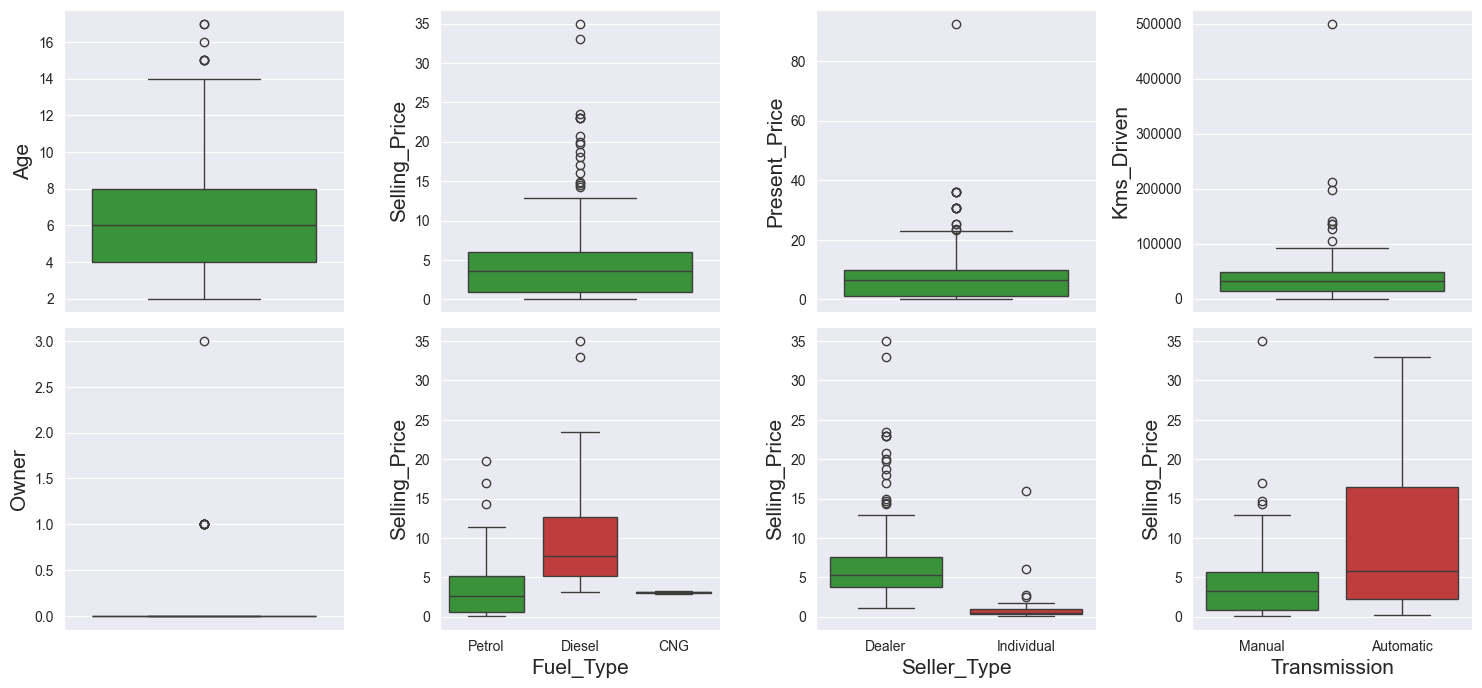

In [97]:
# Set the style for the plots and define a custom color palette
sns.set_style('darkgrid')
#colors = ['#0055ff', '#ff7000', '#23bf00']
colors = ['#2ca02c', '#d62728', '#9467bd']

custom_palette = sns.set_palette(sns.color_palette(colors))

# Order the columns: numeric columns first, followed by categorical
ordered_columns = np.concatenate([
    df.select_dtypes(exclude='object').columns.values,
    df.select_dtypes(include='object').columns.values
])

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 7), dpi=100)

# Iterate through each column and create a boxplot
for i, col in enumerate(ordered_columns):
    row = i // 4
    col_index = i % 4
    ax = axes[row, col_index]
    
    if i < len(df.select_dtypes(exclude='object').columns):  # Plot numeric columns
        sns.boxplot(data=df, y=col, ax=ax, )
        ax.set_ylabel(col, fontsize=15)
    else:  # Plot categorical columns against 'Selling_Price'
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax, hue=col )
        ax.set_xlabel(col, fontsize=15)
        ax.set_ylabel('Selling_Price', fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


### **Statistical Methods:**

#### **Interquartile Range (IQR) Method:**
The IQR method involves calculating the 25th (Q1) and 75th (Q3) percentiles and identifying data points outside 1.5 times the IQR from these quartiles.

#### **Z-score:**
The Z-score method standardizes data points and identifies those that lie a certain number of standard deviations away from the mean. Points with a Z-score greater than a specified threshold (commonly 3) are considered outliers.

### Choosing the Right Method
- Data Characteristics: Choose based on the data distribution and dimensionality.  
- Context: Consider the context and domain knowledge to distinguish between genuine data points and erroneous data.
- Combination: Often, using a combination of methods provides more reliable results.



### IQR Method:

In [117]:
# Initialize an empty list to store indices of outliers
outlier_indices = []

# Target variable
target = 'Selling_Price'

# Function to identify outliers using the IQR method
def find_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()

# Identify outliers in categorical columns with respect to the target
for col in df.select_dtypes(include='object').columns:
    for category in df[col].unique():
        df_category = df[df[col] == category]
        outlier_indices.extend(find_outliers(df_category, target))

# Identify outliers in numerical columns
for col in df.select_dtypes(exclude='object').columns:
    outlier_indices.extend(find_outliers(df, col))

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print(f'{len(outlier_indices)} outliers were identified, whose indices are:\n\n{outlier_indices}')


38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


Deciding when to delete outliers depends on several factors, including the nature of the data, the goals of your analysis, and the potential impact of outliers on your results. Here are some guidelines to help you determine when it might be appropriate to remove outliers:

### 1. **Understand the Source of Outliers**

- **Data Entry Errors:** If outliers are due to obvious data entry errors (e.g., a misplaced decimal point), correcting or removing them is usually appropriate.
- **Measurement Errors:** If outliers are caused by faulty measurements or equipment malfunctions, they should typically be removed.
- **Genuine Variation:** If outliers are legitimate observations reflecting true variability in the data (e.g., extreme but valid measurements), consider whether they are relevant to your analysis.

### 2. **Impact on Analysis**

- **Influence on Models:** Outliers can have a disproportionate influence on statistical models, such as linear regression, where they can skew results. If the analysis is sensitive to these points, and they do not represent the population you want to study, it may be reasonable to remove them.
- **Model Assumptions:** Check whether outliers violate the assumptions of your analysis method (e.g., normality, homoscedasticity). If they do, consider transformation or removal.
- **Effect on Results:** Evaluate whether outliers significantly affect the conclusions drawn from your data. You can compare analysis results with and without outliers to assess their impact.

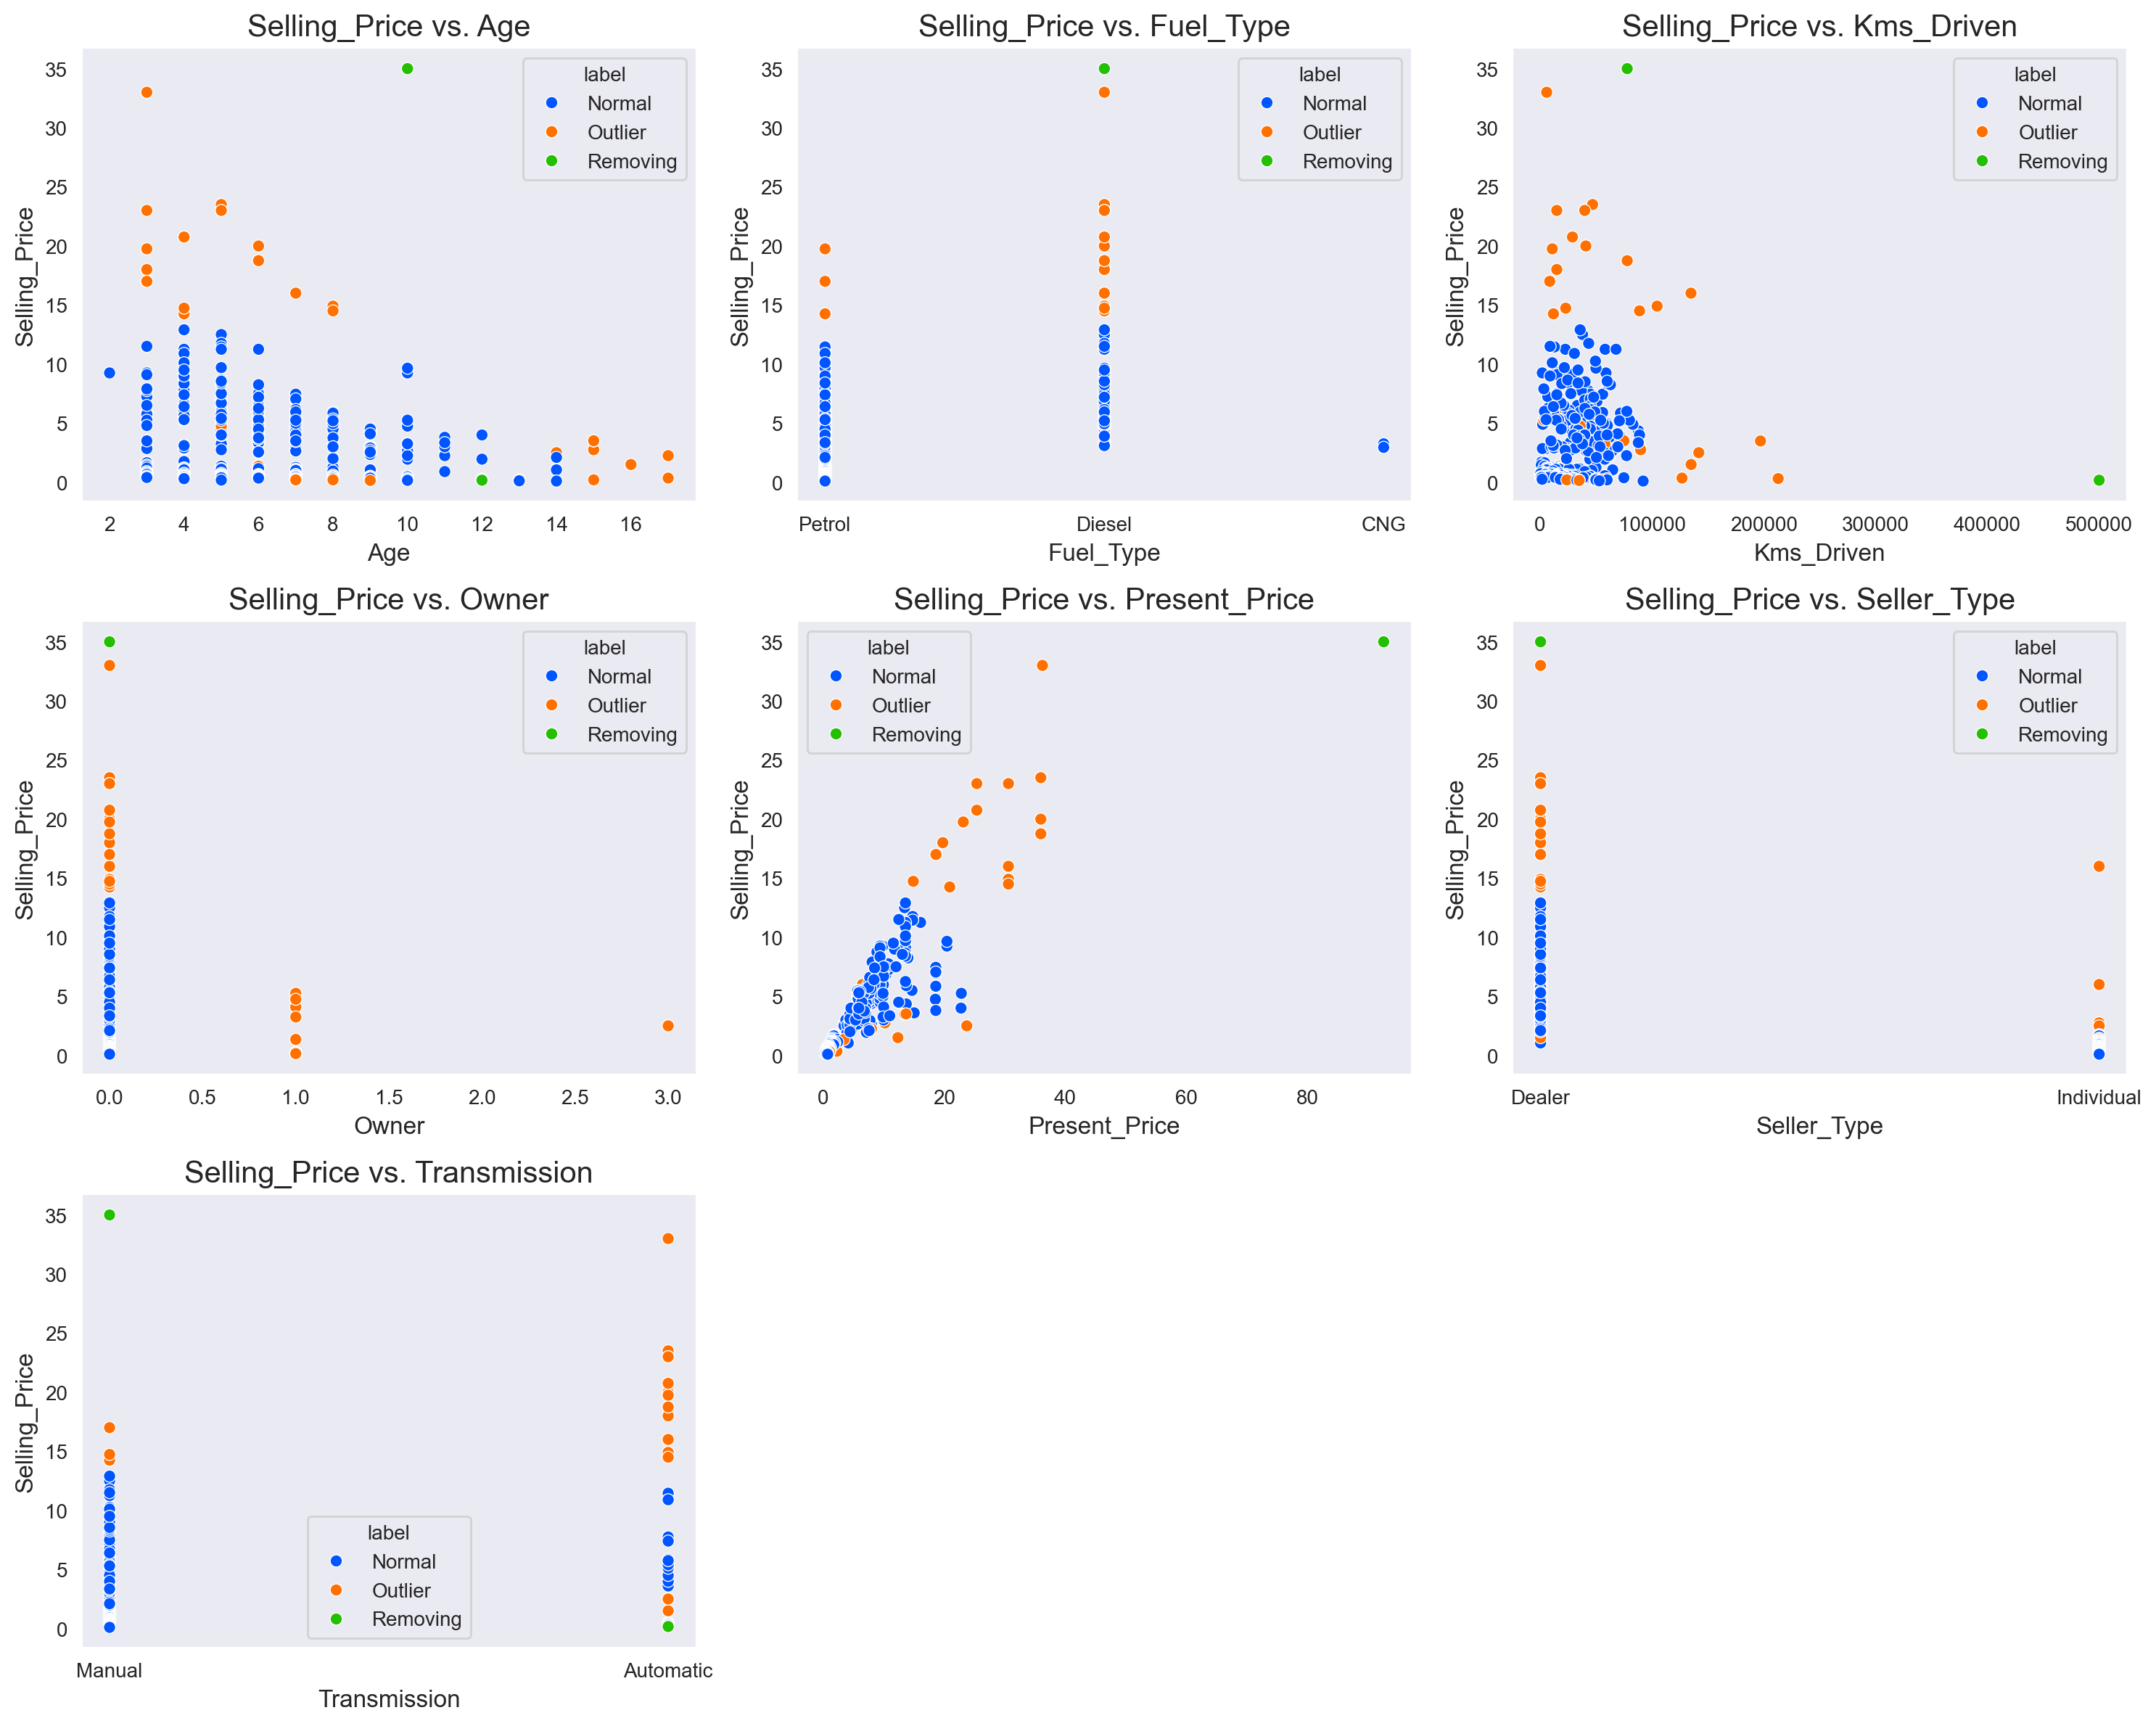

In [118]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outlier_indices, 'label'] = 'Outlier'

# Removing Outliers
removing_indexes = df1[(df1[target] > 33) | (df1['Kms_Driven'] > 400000)].index
df1.loc[removing_indexes, 'label'] = 'Removing'

# Plotting
target = 'Selling_Price'
features = df.columns.difference([target])
colors = ['#0055ff', '#ff7000', '#23bf00']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), dpi=200)

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(data=df1, x=feature, y=target, hue='label', ax=ax[row, col])
    ax[row, col].set_title(f'{target} vs. {feature}', fontsize=15)
    ax[row, col].set_xlabel(feature, fontsize=12)
    ax[row, col].set_ylabel(target, fontsize=12)
    ax[row, col].grid()

# Hide unused subplots
for j in range(i + 1, 9):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


Now lets drop the outliers: 

In [120]:
removing_indexes = list(set(removing_indexes))

df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

print (f"remove indices: {removing_indexes}" )

remove indices: [196, 86]


### **Missing Values:**
use the following command to find the missing values. Here we have none. 

In [122]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### **Dupolicates:**

In this example, we can have cars sharing the same features. So be careful with dropping duplicates.

In [126]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,4,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,4,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,5,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,5,23.00,30.61,40000,Diesel,Dealer,Automatic,0
